In [ ]:
# @title Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Importing datafiles
df_hp=pd.read_excel('/content/drive/MyDrive/Data Mining & Machine Learnings/Datasets/UK House price index.xlsx',sheet_name=2)
df_earnings=pd.read_excel('/content/drive/MyDrive/Data Mining & Machine Learnings/Datasets/earnings-residence-borough.xlsx',sheet_name=1)
df_dod=pd.read_excel('/content/drive/MyDrive/Data Mining & Machine Learnings/Datasets/Number_and_density_of_dwellings_by_borough.xlsx',sheet_name=2)
df_jd=pd.read_excel('/content/drive/MyDrive/Data Mining & Machine Learnings/Datasets/jobs-and-job-density.xlsx',sheet_name=2)
df_pop=pd.read_excel('/content/drive/MyDrive/Data Mining & Machine Learnings/Datasets/ons-mye-custom-age-tool-2020.xlsx',sheet_name=1)

In [ ]:
# @title Preprocessing of Housing Prices
df_hp=df_hp.drop(index=0)

In [ ]:
df_hp = df_hp.rename(columns={df_hp.columns[0]:'Time'})

In [ ]:
df_hp1=pd.melt(frame=df_hp,id_vars="Time",var_name="Borough",value_name="Price")

In [ ]:
df_hp1['Time'] = df_hp1['Time'].astype(str)
df_hp1[['Year','month','day']]= df_hp1['Time'].str.split('-',expand=True)
df_hp1.drop(columns=['Time', 'month','day'],inplace=True)
df_hp1['Year'] = df_hp1['Year'].astype(int)
df_hp1=df_hp1[['Year','Borough','Price']]

In [ ]:
# Grouping by taking mean as data is monthly price
df_hp1 = df_hp1.groupby(['Year', 'Borough'])['Price'].mean().reset_index()
df_hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     1344 non-null   int64  
 1   Borough  1344 non-null   object 
 2   Price    1260 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.6+ KB


In [ ]:
# @title Preprocessing of Earnings
df_earnings=df_earnings.drop([0,1,2])

In [ ]:
df_earnings.columns

Index([       'Code',        'Area',          2002,  'Unnamed: 3',
                2003,  'Unnamed: 5',          2004,  'Unnamed: 7',
                2005,  'Unnamed: 9',          2006, 'Unnamed: 11',
                2007, 'Unnamed: 13',          2008, 'Unnamed: 15',
                2009, 'Unnamed: 17',          2010, 'Unnamed: 19',
                2011, 'Unnamed: 21',          2012, 'Unnamed: 23',
                2013, 'Unnamed: 25',          2014, 'Unnamed: 27',
                2015, 'Unnamed: 29',          2016, 'Unnamed: 31',
                2017, 'Unnamed: 33',          2018, 'Unnamed: 35',
                2019, 'Unnamed: 37',          2020, 'Unnamed: 39',
                2021, 'Unnamed: 41'],
      dtype='object')

In [ ]:
Year=[]
for i in range (2002,2022):
    Year.append(i)
print(Year)

[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [ ]:
df_earnings = df_earnings.loc[:, ['Code','Area',2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]]

In [ ]:
df_earnings=df_earnings.drop(columns='Code')

In [ ]:
df_earnings1=pd.melt(frame=df_earnings,id_vars=['Area'],var_name="Year",value_name="Earnings")

In [ ]:
# Multiplying by 48 considering 48 working weeks in a year
df_earnings1['Earnings']=df_earnings1['Earnings']*48

In [ ]:
df_earnings1 = df_earnings1.rename(columns={'Area': 'Borough'})
df_earnings1=df_earnings1[['Year','Borough','Earnings']]

In [ ]:
# @title Preprocessing of Density of Dwellings
df_dod=df_dod.drop(index=0,columns=['ONS code','Total Area (Hectares)'])

In [ ]:
df_dod.head()

,Area name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,City of London,15.904703,16.247944,16.276839,16.712162,17.064930,17.062072,17.065565,17.211943,17.358321,17.333236,17.505016,17.562170,17.673303,19.060876,19.778477,20.022970,20.045196,20.483377,20.658015
2,Barking and Dagenham,18.068574,18.128813,18.211275,18.227598,18.323288,18.394109,18.475248,18.664590,18.740703,18.769195,18.804302,18.897425,19.031290,19.224679,19.360661,19.554315,19.711990,19.821251,20.060938
3,Barnet,15.045249,15.078172,15.202970,15.315087,15.435735,15.555461,15.611669,15.755949,15.881438,15.979146,16.063252,16.307020,16.465409,16.593711,16.746336,16.914409,17.121790,17.376320,17.630965
4,Bexley,14.249786,14.296701,14.345794,14.458821,14.500914,14.533985,14.582612,14.634349,14.679865,14.746380,14.783495,14.815073,14.880095,14.962228,15.088228,15.067695,15.186539,15.229628,15.305227
5,Brent,23.460748,23.784832,24.020325,24.160983,24.308811,24.696042,24.974095,25.220923,25.500133,25.770785,25.925552,26.055084,26.208209,26.377988,26.738596,26.981699,27.297201,27.457728,27.860433


In [ ]:
df_dod1=pd.melt(frame=df_dod,id_vars=['Area name'],var_name='Year',value_name="Density of Dwellings")

In [ ]:
df_dod1=df_dod1[['Year','Area name','Density of Dwellings']]

In [ ]:
df_dod1 = df_dod1.rename(columns={'Area name': 'Borough'})

In [ ]:
# @title Preprocessing of Job Density
df_jd=df_jd.drop(index=0,columns="Code")

In [ ]:
df_jd = df_jd.rename(columns={'Area': 'Borough'})

In [ ]:
df_jd1=pd.melt(frame=df_jd,id_vars=['Borough'],var_name='Year',value_name="Job Density")

In [ ]:
df_jd1=df_jd1[['Year','Borough','Job Density']]

In [ ]:
# @title Preprocessing of Population
new_header = df_pop.iloc[12]  # Get the 12th row as a new header
df_pop = df_pop[13:]              # Remove the 12th row from the DataFrame
df_pop = df_pop.rename(columns=new_header)

In [ ]:
df_pop1=df_pop[['Year','Area name','Persons']]

In [ ]:
df_pop1 = df_pop1.rename(columns={'Area name': 'Borough', 'Persons':'Population'})

In [ ]:
df_pop1.head()

,Year,Borough,Population
13,1999,Barking and Dagenham,162444
14,2000,Barking and Dagenham,163893
15,2001,Barking and Dagenham,165654
16,2002,Barking and Dagenham,166357
17,2003,Barking and Dagenham,166210


In [ ]:
df_dod1.head()

,Year,Borough,Density of Dwellings
0,2001,City of London,15.904703
1,2001,Barking and Dagenham,18.068574
2,2001,Barnet,15.045249
3,2001,Bexley,14.249786
4,2001,Brent,23.460748


In [ ]:
df_hp1.head()

,Year,Borough,Price
0,1995,Barking & Dagenham,51817.969390
1,1995,Barnet,91792.537433
2,1995,Bexley,64291.532845
3,1995,Brent,73029.841840
4,1995,Bromley,81967.316732


In [ ]:
df_earnings1.head()

,Year,Borough,Earnings
0,2002,Barking and Dagenham,18398.4
1,2002,Barnet,20515.2
2,2002,Bexley,19440
3,2002,Brent,17683.2
4,2002,Bromley,21124.8


In [ ]:
df_jd1.head()

,Year,Borough,Job Density
0,2000,City of London,67.10
1,2000,Barking and Dagenham,0.56
2,2000,Barnet,0.67
3,2000,Bexley,0.55
4,2000,Brent,0.67


In [ ]:
# from google.colab import files

# # Assuming your DataFrame is named `df`
# df_hp1.to_csv('df_hp1.csv', index=False)
# df_pop1.to_csv('df_pop1.csv', index=False)
# df_jd1.to_csv('df_jd1.csv', index=False)
# df_earnings1.to_csv('df_earnings1.csv', index=False)
# df_dod1.to_csv('df_dod1.csv', index=False)

# # Download the file
# files.download('df_hp1.csv')
# files.download('df_pop1.csv')
# files.download('df_jd1.csv')
# files.download('df_earnings1.csv')
# files.download('df_dod1.csv')


In [ ]:
#@title Creating a Dictionary for Normalizing
normalize_dict = {
    'Barking & Dagenham': 'Barking and Dagenham',
    'Barking and Dagenham': 'Barking and Dagenham',
    'Barnet': 'Barnet',
    'Bexley': 'Bexley',
    'Brent': 'Brent',
    'Bromley': 'Bromley',
    'Camden': 'Camden',
    'Croydon': 'Croydon',
    'Ealing': 'Ealing',
    'Enfield': 'Enfield',
    'Greenwich': 'Greenwich',
    'Hackney': 'Hackney',
    'Hammersmith & Fulham': 'Hammersmith and Fulham',
    'Hammersmith and Fulham': 'Hammersmith and Fulham',
    'Haringey': 'Haringey',
    'Harrow': 'Harrow',
    'Havering': 'Havering',
    'Hillingdon': 'Hillingdon',
    'Hounslow': 'Hounslow',
    'Islington': 'Islington',
    'Kensington & Chelsea': 'Kensington and Chelsea',
    'Kensington and Chelsea': 'Kensington and Chelsea',
    'Kingston upon Thames': 'Kingston upon Thames',
    'Lambeth': 'Lambeth',
    'Lewisham': 'Lewisham',
    'Merton': 'Merton',
    'Newham': 'Newham',
    'Redbridge': 'Redbridge',
    'Richmond upon Thames': 'Richmond upon Thames',
    'Southwark': 'Southwark',
    'Sutton': 'Sutton',
    'Tower Hamlets': 'Tower Hamlets',
    'Waltham Forest': 'Waltham Forest',
    'Wandsworth': 'Wandsworth',
    'Westminster': 'Westminster'
}


In [ ]:
# Normalizing as Borough Names are in different format
df_hp1['Borough'] = df_hp1['Borough'].replace(normalize_dict)
df_pop1['Borough'] = df_pop1['Borough'].replace(normalize_dict)
df_jd1['Borough'] = df_jd1['Borough'].replace(normalize_dict)
df_earnings1['Borough'] = df_earnings1['Borough'].replace(normalize_dict)
df_dod1['Borough'] = df_dod1['Borough'].replace(normalize_dict)




In [ ]:
#@title Combining processed data files into one file
merged_df1 = pd.merge(df_hp1,df_earnings1, on=['Year', 'Borough'], how='left')
merged_df2 = pd.merge(df_jd1, df_dod1, on=['Year', 'Borough'], how='left')
merged_df3 = pd.merge(merged_df1,merged_df2, on=['Year', 'Borough'], how='left')
merged_df=pd.merge(merged_df3,df_pop1,on=['Year', 'Borough'], how='left')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1344 non-null   object 
 1   Borough               1344 non-null   object 
 2   Price                 1260 non-null   float64
 3   Earnings              640 non-null    object 
 4   Job Density           748 non-null    float64
 5   Density of Dwellings  646 non-null    float64
 6   Population            792 non-null    object 
dtypes: float64(3), object(4)
memory usage: 84.0+ KB


In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.reset_index(drop=True,inplace=True)

In [ ]:
merged_df.head()

,Year,Borough,Price,Earnings,Job Density,Density of Dwellings,Population
0,2002,Barking and Dagenham,112221.912482,18398.4,0.50,18.128813,166357
1,2002,Barnet,220746.059225,20515.2,0.64,15.078172,320552
2,2002,Bexley,136797.964475,19440,0.57,14.296701,219123
3,2002,Brent,185898.147992,17683.2,0.62,23.784832,269871
4,2002,Bromley,186646.043217,21124.8,0.63,8.590555,296668


In [ ]:
merged_df.columns

Index(['Year', 'Borough', 'Price', 'Earnings', 'Job Density',
       'Density of Dwellings', 'Population'],
      dtype='object')

In [ ]:
merged_df['Year']=merged_df['Year'].astype(int)

In [ ]:
# from google.colab import files
# merged_df.to_csv('merged_df.csv', index=False)
# files.download('merged_df.csv')

In [ ]:
# @title **Visualisations**

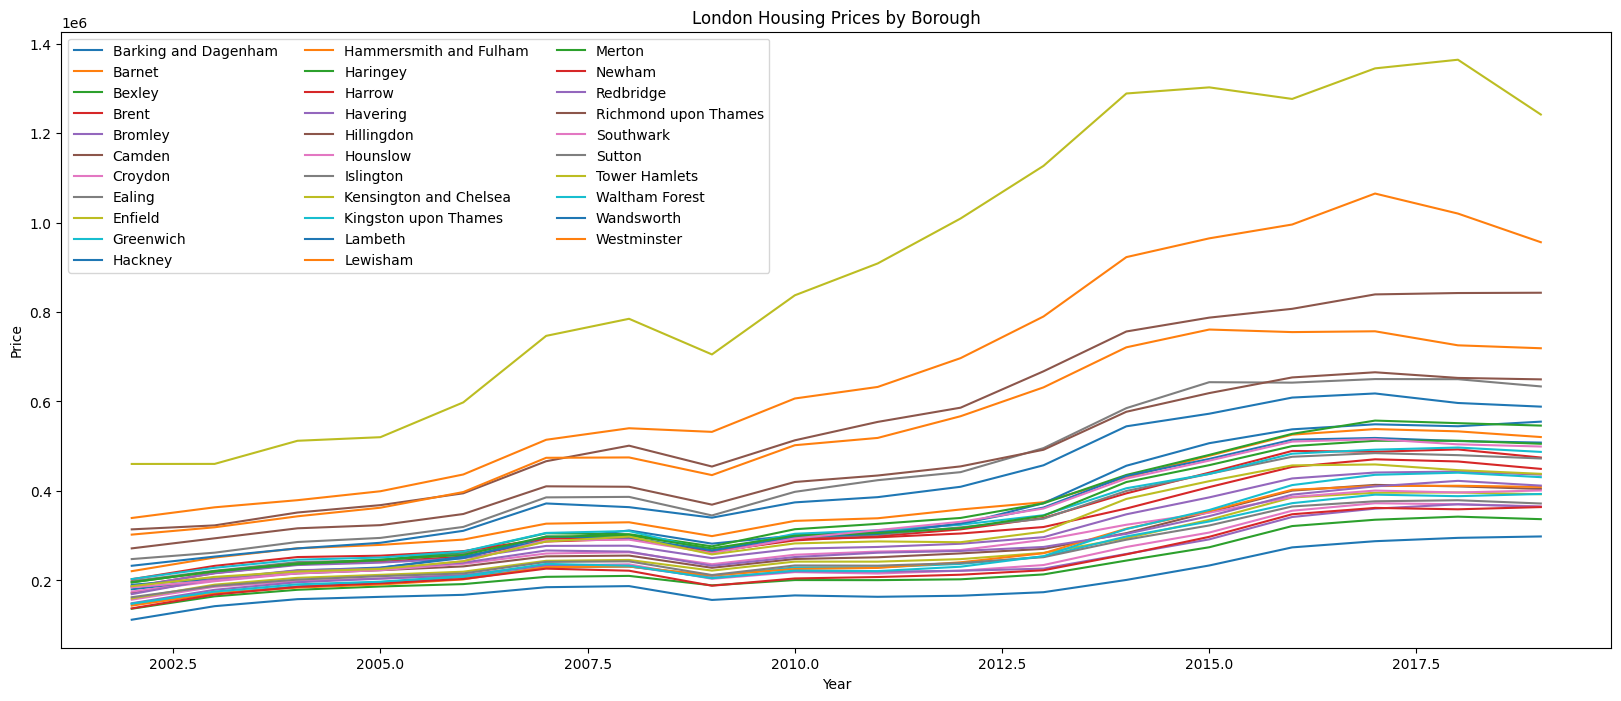

In [ ]:

# @title Creating Line Graph to Check for Trend
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots(figsize=(20,8))

# iterate over the boroughs and plot the line graphs
for borough in merged_df['Borough'].unique():
    df_temp = merged_df[merged_df['Borough']==borough]
    ax.plot(df_temp['Year'], df_temp['Price'], label=borough)

# set the x and y labels
ax.set_xlabel('Year')
ax.set_ylabel('Price')

# set the title of the plot
ax.set_title('London Housing Prices by Borough')

# split the legend into two columns and place it in the top right corner
ax.legend(loc='upper left', ncol=3)

# show the plot
plt.show()


In [ ]:

# Calculate median prices for each borough
median_prices = merged_df.groupby('Borough')['Price'].median()

# Find highest and lowest median prices
highest_median_price = np.max(median_prices)
lowest_median_price = np.min(median_prices)

# Find boroughs with highest and lowest median prices
highest_median_price_borough = median_prices.idxmax()
lowest_median_price_borough = median_prices.idxmin()


print(f"The borough with the highest median price is {highest_median_price_borough} with a median price of {highest_median_price}")
print(f"The borough with the lowest median price is {lowest_median_price_borough} with a median price of {lowest_median_price}")


The borough with the highest median price is Kensington and Chelsea with a median price of 872940.0208958333
The borough with the lowest median price is Barking and Dagenham with a median price of 170793.48374583333


In [ ]:
merged_df['Year'].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
merged_df.columns

Index(['Year', 'Borough', 'Price', 'Earnings', 'Job Density',
       'Density of Dwellings', 'Population'],
      dtype='object')

In [ ]:
merged_df[['Population','Earnings']]=merged_df[['Population','Earnings']].astype(int)

In [ ]:
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y').dt.year

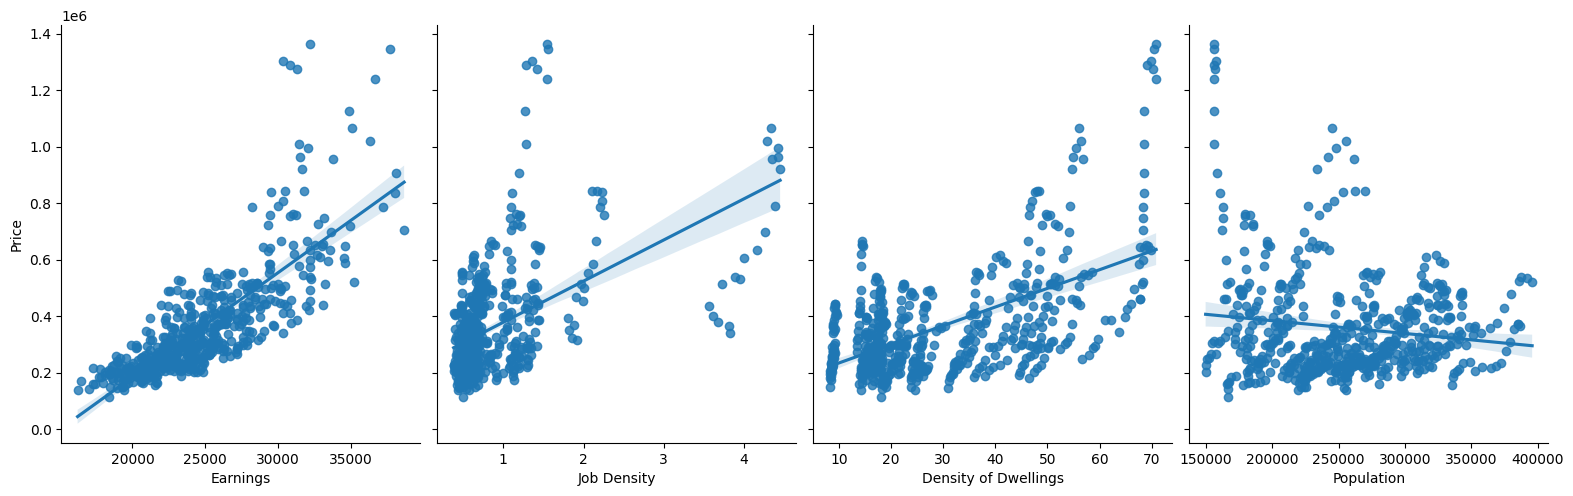

In [ ]:
# @title Creating Pairplot
sns.pairplot(merged_df, x_vars=['Earnings', 'Job Density', 'Density of Dwellings', 'Population'], y_vars=['Price'], height=5, aspect=0.8, kind='reg')
plt.show()

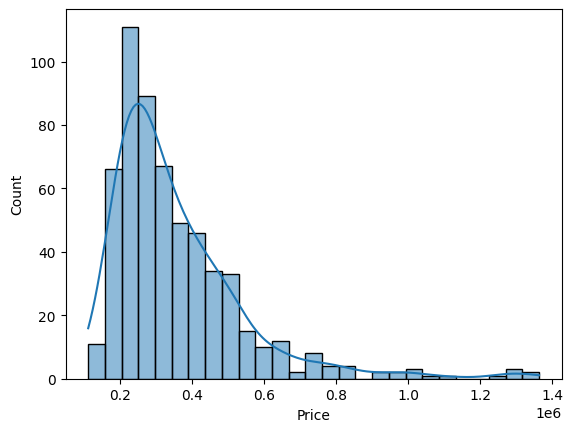

In [ ]:
# @title Creating a Histogram
sns.histplot(merged_df['Price'],kde=True)
plt.show()

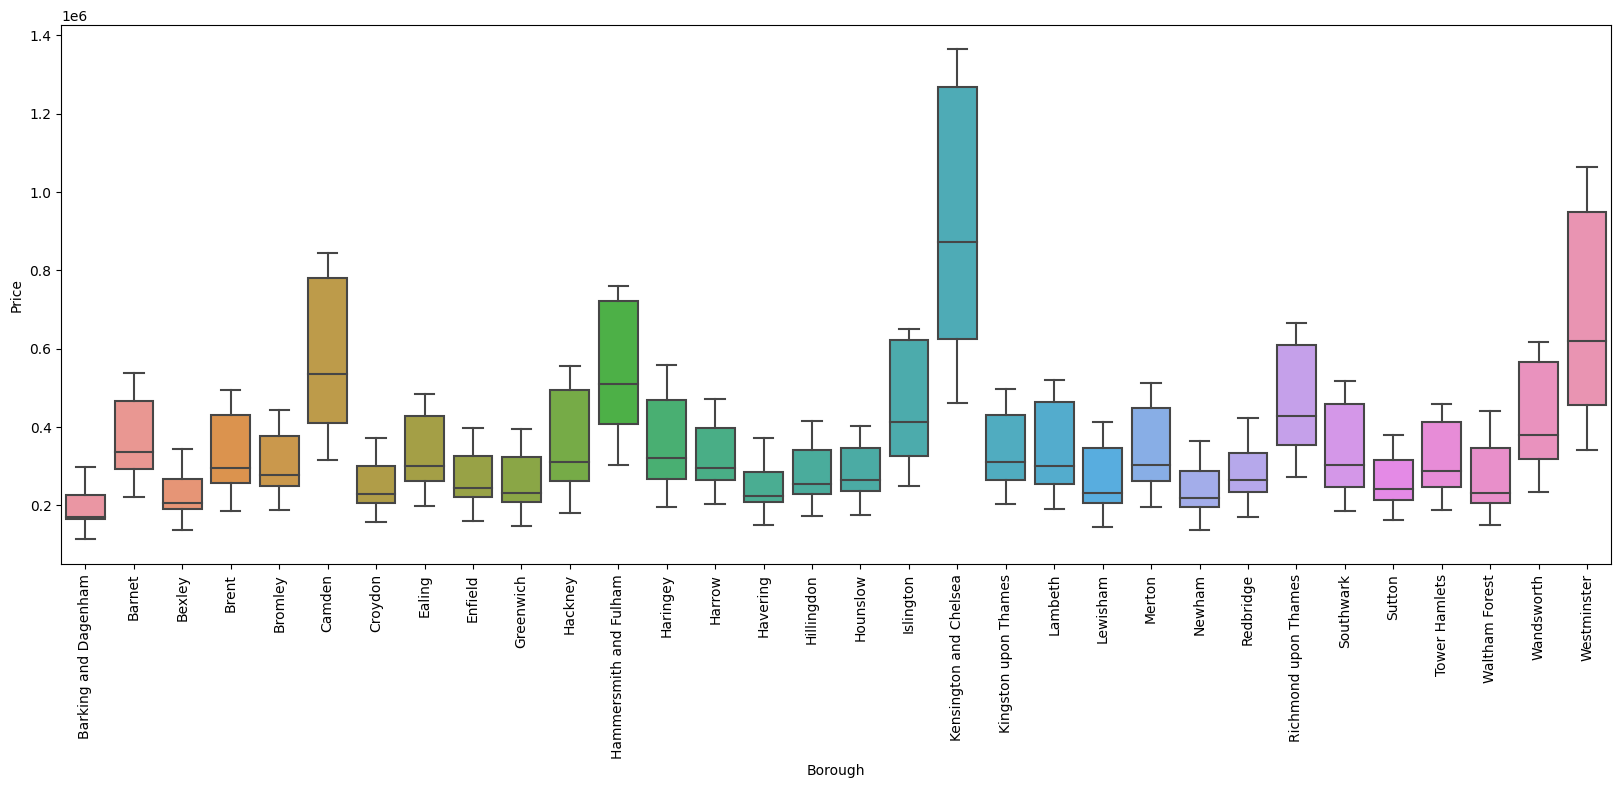

In [ ]:
# @title Creating a Boxplot
plt.figure(figsize=(20, 7))
sns.boxplot(x='Borough', y='Price', data=merged_df)
plt.xticks(rotation=90)
plt.show()

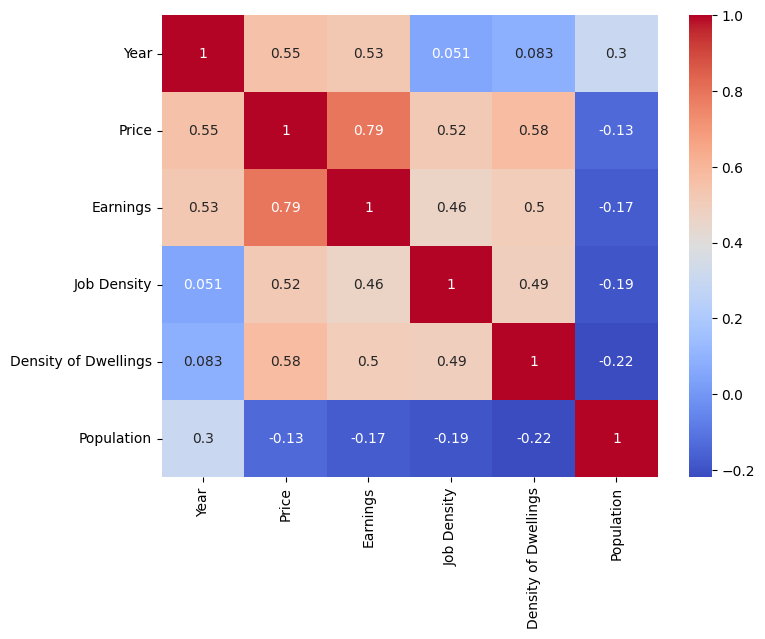

In [ ]:
# @title Creating a Correlation Matrix
plt.figure(figsize=(8,6))
corr = merged_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
corr = merged_df.corr()['Price'].sort_values(ascending=False)
print(corr)

Price                   1.000000
Earnings                0.793113
Density of Dwellings    0.579069
Year                    0.553550
Job Density             0.521666
Population             -0.134351
Name: Price, dtype: float64


In [ ]:
# @title Performing K-means Clustering



In [ ]:
# @title Converting the Borough names into dummy variables
cat_boroughs = pd.get_dummies(merged_df['Borough'])

In [ ]:
merged_df1 = pd.concat([merged_df,cat_boroughs], axis=1)
merged_df1 = merged_df1.drop('Borough', axis=1)

In [ ]:
merged_df1.head()

,Year,Price,Earnings,Job Density,Density of Dwellings,Population,Barking and Dagenham,Barnet,Bexley,Brent,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,2002,112221.912482,18398,0.50,18.128813,166357,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2002,220746.059225,20515,0.64,15.078172,320552,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,136797.964475,19440,0.57,14.296701,219123,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,185898.147992,17683,0.62,23.784832,269871,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2002,186646.043217,21124,0.63,8.590555,296668,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# @title **Supervised Learning Models**
# Specifying target and  independent variables
X = merged_df1.drop(['Price'], axis=1)
y = merged_df1['Price']
# Splitting into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# @title Trying Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

scores_rg = cross_val_score(regressor, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores of Regression
print('Cross-validation scores of Regression Model:', scores_rg)
print('Mean of Cross-validation scores of Regression Model:', scores_rg.mean())
print('Standard deviation of Cross-validation scores of Regression Model:', scores_rg.std())

from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)



Cross-validation scores of Regression Model: [0.19061874 0.82692297 0.93435131 0.92280181 0.91632081]
Mean of Cross-validation scores of Regression Model: 0.7582031270720557
Standard deviation of Cross-validation scores of Regression Model: 0.2863552205190819
Mean Absolute Error (MAE): 34064.40713234641
Mean Squared Error (MSE): 1893771976.8076575
Root Mean Squared Error (RMSE): 43517.49047001283
R-squared score: 0.9498693744569825


In [ ]:
# Get the coefficients and intercept
coefficients = regressor.coef_
intercept = regressor.intercept_

# Create the equation
equation = 'y = ' + str(intercept)

for i, col in enumerate(X.columns):
    equation += ' + (' + str(coefficients[i]) + ' * ' + col + ')'

print(equation)


y = -54825507.58065216 + (27540.91757469448 * Year) + (-12.232752093286258 * Earnings) + (410148.0380128935 * Job Density) + (17130.6435476234 * Density of Dwellings) + (-2.893084943984555 * Population) + (-76449.19317997634 * Barking and Dagenham) + (598759.9664845373 * Barnet) + (166742.335251785 * Bexley) + (223515.02063942607 * Brent) + (561761.6746907416 * Bromley) + (-575239.7168227577 * Camden) + (485968.5077137507 * Croydon) + (368589.0887471953 * Ealing) + (384728.4689433714 * Enfield) + (180282.980928966 * Greenwich) + (-371080.49269385985 * Hackney) + (-400668.0186496797 * Hammersmith and Fulham) + (50125.79766684256 * Haringey) + (234367.07719863264 * Harrow) + (280174.4818265231 * Havering) + (210402.23591834103 * Hillingdon) + (64412.11290815372 * Hounslow) + (-829611.398017272 * Islington) + (-462394.7412022341 * Kensington and Chelsea) + (-41009.26276257488 * Kingston upon Thames) + (-135165.2354420051 * Lambeth) + (63128.784675687646 * Lewisham) + (50563.410427273324 *

In [ ]:
# y = -5.48e+07 + 2.75e+04 * Year - 12.23 * Earnings + 4.10e+05 * Job Density + 1.71e+04 * Density of Dwellings - 2.89 * Population + (coefficients for each borough)

In [ ]:
# @title Trying Decision Tree

In [ ]:
decisiontree=DecisionTreeRegressor()
decisiontree.fit(X_train,y_train)

y_pred1 = decisiontree.predict(X_test)

scores_dt = cross_val_score(decisiontree, X, y, cv=5)

# Print the mean and standard deviation of the cross-validation scores of Decision Treee
print('Cross-validation scores of Decision Tree:', scores_dt)
print('Mean:', scores_dt.mean())
print('Standard deviation:', scores_dt.std())

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared score
r2 = r2_score(y_test, y_pred1)
print("R-squared score:", r2)



Cross-validation scores of Decision Tree: [0.46405861 0.76737307 0.77493329 0.8133639  0.86869858]
Mean: 0.7376854903117708
Standard deviation: 0.14144403070988557
Mean Absolute Error (MAE): 38149.11816864162
Mean Squared Error (MSE): 2965855530.1266513
Root Mean Squared Error (RMSE): 54459.668839671176
R-squared score: 0.9214899181019154


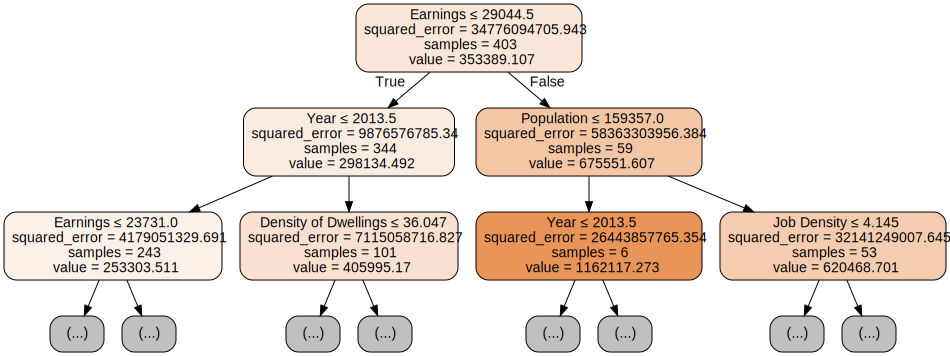

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export decision tree to DOT format
dot_data = export_graphviz(decisiontree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True, max_depth=2)

# Display the decision tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Save the decision tree as a PDF file
graph



In [ ]:
# from google.colab import files
# # Download the decision tree file
# files.download('decision_tree.pdf')

In [ ]:
# @title Trying Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred2 = rf.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross Validation Scores
scores_rf = cross_val_score(rf, X, y, cv=5)
print('Cross-validation scores of Random Forest:', scores_rf)
print('Mean:', scores_rf.mean())
print('Standard deviation:', scores_rf.std())

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pred2)))
print('R-squared score:', r2_score(y_test, y_pred2))


Cross-validation scores of Random Forest: [0.62269816 0.82859699 0.88927483 0.82076551 0.80845241]
Mean: 0.7939575792953761
Standard deviation: 0.0900486779220808
Mean Absolute Error (MAE): 31659.9937971894
Mean Squared Error (MSE): 2381332294.2640767
Root Mean Squared Error (RMSE): 48798.89644514594
R-squared score: 0.9369630140274423


In [ ]:
# @title **Comparing the 3 Models**

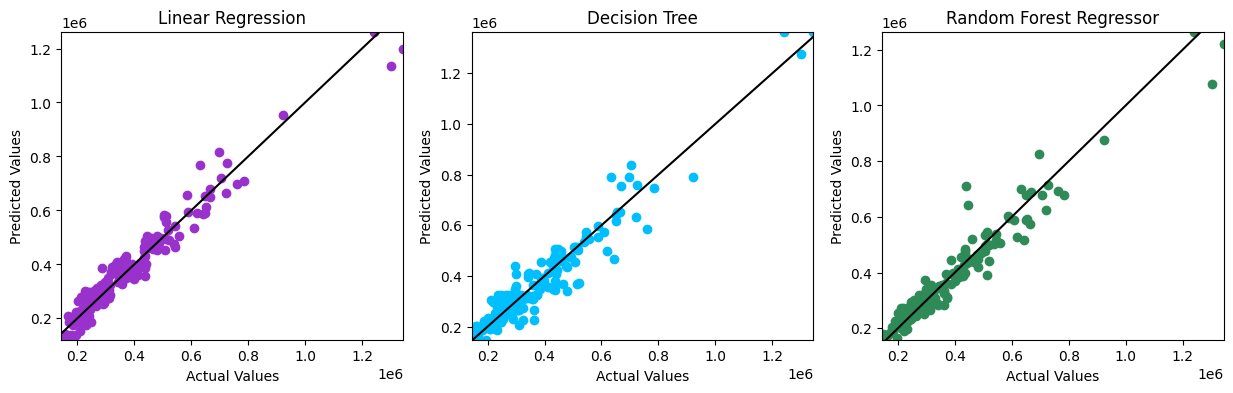

In [ ]:

# Create scatter plot for Linear Regression model
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(y_test, y_pred, color='darkorchid')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_xlim([np.min(y_test), np.max(y_test)])
axs[0].set_ylim([np.min(y_pred), np.max(y_pred)])
axs[0].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='black')

# Create scatter plot for Decision Tree model
axs[1].scatter(y_test, y_pred1, color='deepskyblue')
axs[1].set_title('Decision Tree')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_xlim([np.min(y_test), np.max(y_test)])
axs[1].set_ylim([np.min(y_pred1), np.max(y_pred1)])
axs[1].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='black')

# Create scatter plot for Random Forest Regressor model
axs[2].scatter(y_test, y_pred2, color='seagreen')
axs[2].set_title('Random Forest Regressor')
axs[2].set_xlabel('Actual Values')
axs[2].set_ylabel('Predicted Values')
axs[2].set_xlim([np.min(y_test), np.max(y_test)])
axs[2].set_ylim([np.min(y_pred2), np.max(y_pred2)])
axs[2].plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='black')

plt.show()


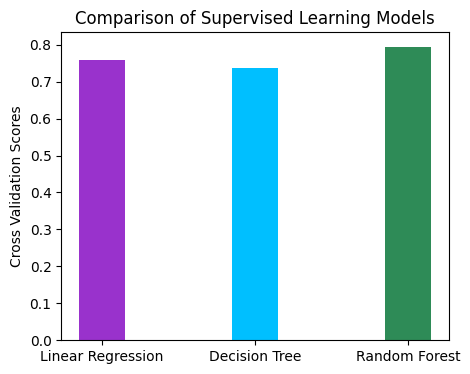

In [ ]:
import matplotlib.pyplot as plt

# Comparing Validation Scores for each model
Validation_scores = [scores_rg.mean(), scores_dt.mean(), scores_rf.mean()]

# Define model labels and colors
model_labels = ['Linear Regression', 'Decision Tree', 'Random Forest']
model_colors = ['darkorchid', 'deepskyblue', 'seagreen']

# Create bar chart
fig, ax = plt.subplots(figsize=(5, 4))
ax.bar(model_labels, Validation_scores, color=model_colors, width=0.3)

# Add chart labels
ax.set_ylabel('Cross Validation Scores')
ax.set_title('Comparison of Supervised Learning Models')


plt.show()


In [ ]:
# @title **Unsupervised Learning Model- Kmeans Clustering**

In [ ]:
df=merged_df.groupby(['Borough']).mean()

# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Price']])
df['Price'] = scaler.transform(df[['Price']])

scaler.fit(df[['Earnings']])
df['Earnings'] = scaler.transform(df[['Earnings']])

scaler.fit(df[['Job Density']])
df['Job Density'] = scaler.transform(df[['Job Density']])

scaler.fit(df[['Density of Dwellings']])
df['Density of Dwellings'] = scaler.transform(df[['Density of Dwellings']])

In [ ]:
# @title Clustering For Housing Price and Earnings - 1st subset of Data
df1=df[['Price','Earnings']]

Text(0, 0.5, 'Earnings')

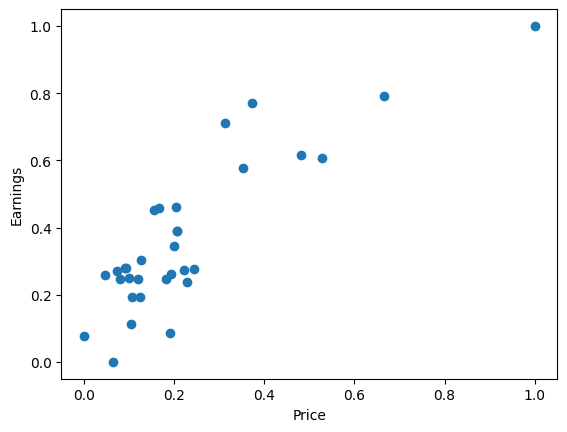

In [ ]:
plt.scatter(df1['Price'],df1['Earnings'])
plt.xlabel('Price')
plt.ylabel('Earnings')

In [ ]:
# Asumming cluster count =3 from visualisation
km=KMeans(n_clusters=3, random_state= 42)

In [ ]:
y_predicted1=km.fit_predict(df1[['Price','Earnings']])

In [ ]:
y_predicted1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

In [ ]:
df1['Cluster']=y_predicted1


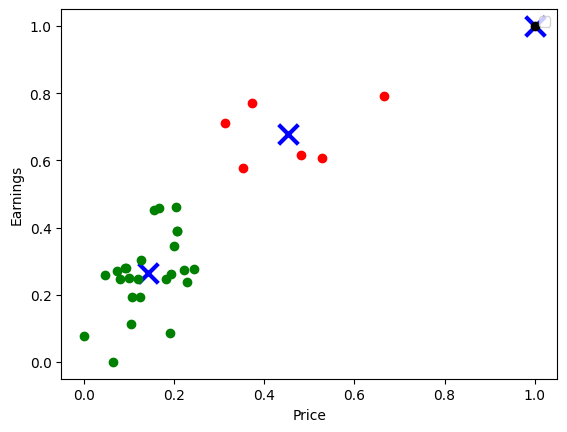

In [ ]:
dfc1 = df1[df1.Cluster==0]
dfc2 = df1[df1.Cluster==1]
dfc3 = df1[df1.Cluster==2]

centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='blue')

plt.scatter(dfc1.Price,dfc1['Earnings'],color='green')
plt.scatter(dfc2.Price,dfc2['Earnings'],color='red')
plt.scatter(dfc3.Price,dfc3['Earnings'],color='black')
plt.xlabel('Price')
plt.ylabel('Earnings')
plt.legend()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate Silhouette Coefficient for cluster 1
score1 = silhouette_score(df1[['Price','Earnings']], df1['Cluster'])

# Calculate Calinski-Harabasz Index for cluster 1
score2 = calinski_harabasz_score(df1[['Price','Earnings']], df1['Cluster'])

print('Silhouette Coefficient:', score1)
print('Calinski-Harabasz Index:', score2)


Silhouette Coefficient: 0.632317591404605
Calinski-Harabasz Index: 61.210909124528435


In [ ]:
# Learnings from 1st Subset of Data
# Cluster 0: This cluster contains boroughs with relatively low housing prices and earnings.
# These boroughs could be considered more affordable, and may be attractive to people who are looking for cheaper housing options.

# Cluster 1: This cluster contains boroughs with higher housing prices and earnings compared to cluster 0.
# These boroughs could be considered more expensive and may be attractive to individuals with higher income levels.

# Cluster 2: This cluster contains only one borough, Kensington and Chelsea, which has the highest housing prices and earnings among all boroughs.
# This borough could be considered a premium location with high-end housing options and a high cost of living.



In [ ]:
# @title Clustering for Job Density And Earnings  - 2nd subset of Data

In [ ]:
df2=df[['Job Density','Earnings']]


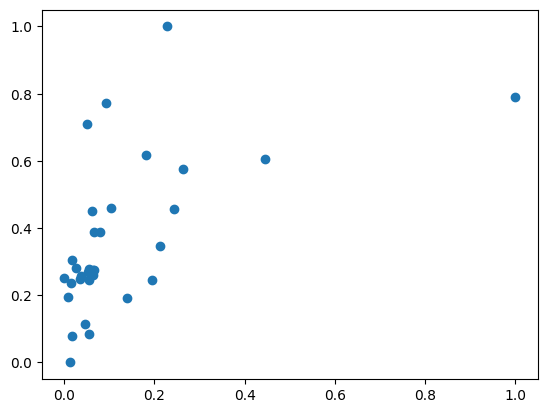

In [ ]:
plt.scatter(df2['Job Density'], df2['Earnings'])

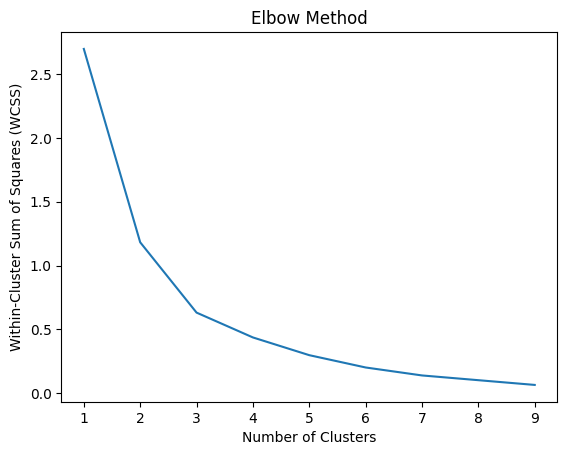

In [ ]:

# Specify the range of clusters to test
n_clusters_range = range(1, 10)

# Create an empty list to store the WCSS values
wcss0 = []

# Loop through the range of clusters and calculate the WCSS for each
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df2)
    wcss0.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(n_clusters_range, wcss0)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(df2)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df2['Cluster'] = labels

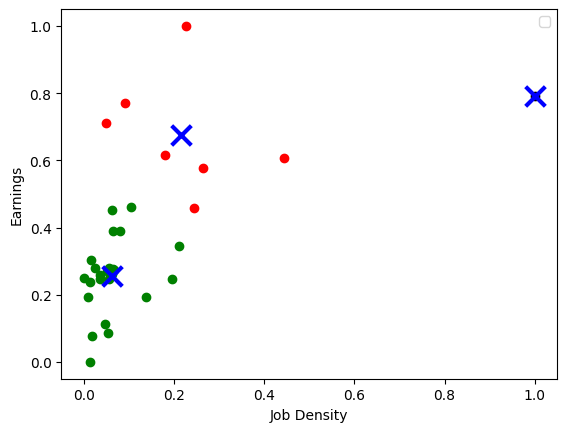

In [ ]:
dfcc1 = df2[df2.Cluster==0]
dfcc2 = df2[df2.Cluster==1]
dfcc3 = df2[df2.Cluster==2]

plt.scatter(dfcc1['Job Density'],dfcc1['Earnings'],color='green')
plt.scatter(dfcc2['Job Density'],dfcc2['Earnings'],color='red')
plt.scatter(dfcc3['Job Density'],dfcc3['Earnings'],color='black')
plt.xlabel('Job Density')
plt.ylabel('Earnings')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='blue')

plt.legend()


In [ ]:
# Calculate Silhouette Coefficient for cluster 2
score1 = silhouette_score(df2[['Job Density','Earnings']], df2['Cluster'])

# Calculate Calinski-Harabasz Index for cluster 2
score2 = calinski_harabasz_score(df2[['Job Density','Earnings']], df2['Cluster'])

print('Silhouette Coefficient:', score1)
print('Calinski-Harabasz Index:', score2)

Silhouette Coefficient: 0.5859374919125802
Calinski-Harabasz Index: 47.470188848357736


In [ ]:
# Learnings from Second Subset of Data
# Cluster 0 has a relatively lower job density and earnings compared to the other two clusters.
# This cluster includes 20 boroughs such as Barking and Dagenham, Barnet, Bromley, Croydon, Enfield, Greenwich, Lewisham, Redbridge, Sutton, and Waltham Forest.

# Cluster 1 has a higher job density and earnings compared to cluster 0 but lower than cluster 2.
# This cluster includes 8 boroughs such as Camden, Hammersmith and Fulham, Islington, Kensington and Chelsea, Richmond upon Thames, Tower Hamlets, Wandsworth.

# Cluster 2 has the highest job density and earnings compared to the other two clusters.
# This cluster includes only one borough, Westminster.
# Overall, the clustering task suggests that Westminster stands out as a borough with the highest job density and earnings compared to other boroughs in London.

In [ ]:
# @title Clustering For Job Density, Density of Dwellings and Price - 3rd subset of Data

In [ ]:
df3=df[['Job Density','Density of Dwellings','Price']]

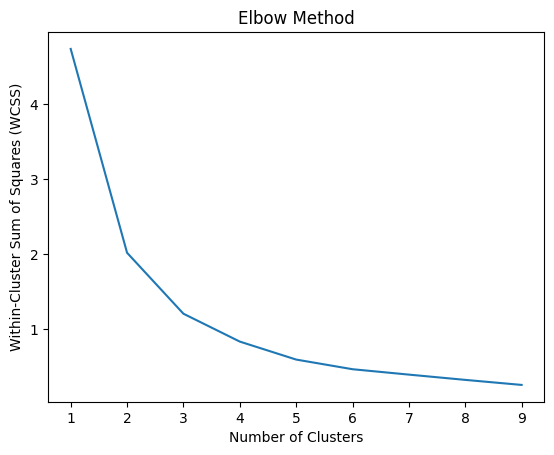

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify the range of clusters to test
n_clusters_range = range(1, 10)

# Create an empty list to store the WCSS values
wcss = []

# Loop through the range of clusters and calculate the WCSS for each
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(n_clusters_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(df3)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df3['Cluster'] = labels

In [ ]:
# Calculate Silhouette Coefficient for cluster 3
score1 = silhouette_score(df3[['Job Density','Density of Dwellings','Price']], df3['Cluster'])

# Calculate Calinski-Harabasz Index for cluster 3
score2 = calinski_harabasz_score(df3[['Job Density','Density of Dwellings','Price']], df3['Cluster'])

print('Silhouette Coefficient:', score1)
print('Calinski-Harabasz Index:', score2)

Silhouette Coefficient: 0.5388193945793722
Calinski-Harabasz Index: 41.65733955794917


In [ ]:
# Visualising 3d Cluster
import plotly.express as px

fig = px.scatter_3d(df3, x='Job Density', y='Density of Dwellings', z='Price', color='Cluster')
fig.show()


In [ ]:
# Learnings from Third Subset of Data
# Cluster 0: This cluster has boroughs with the highest job density and dwelling density compared to the other clusters.
# The average price of properties in this cluster is also relatively high. This cluster includes some of the most central boroughs
# of London, such as Camden and  Islington. These boroughs are popular among professionals and have a
#  high concentration of businesses and job opportunities, which can explain the high job density. The high density of dwellings is
#   also expected in these areas due to the high demand for housing. The high property prices in this cluster may be due to the
#   high desirability of these areas.

# Cluster 1: This cluster consists of boroughs with moderate job density and dwelling density, and relatively lower property prices.
# These boroughs are spread throughout London and include Barking and Dagenham, Barnet, Bexley, Brent, Bromley, Croydon, Ealing, Enfield,
# Greenwich, Harrow, Havering, Hillingdon, Hounslow, Kingston upon Thames,Lewisham, Merton, Newham, Redbridge, Richmond upon Thames, Sutton,
#  and Waltham Forest. These boroughs are relatively affordable compared to those in Cluster 0, and therefore, may be popular among
#   people who are looking for more affordable housing options while still having access to job opportunities.

# Cluster 2: This cluster consists of only two boroughs: 'Kensington and Chelsea' and Westminster. These boroughs have the highest property prices
#  among all the boroughs in London. They are known for being among the most desirable areas to live in, with excellent amenities,
#  job opportunities, and high standards of living. The high property prices may be due to the high demand for properties in these areas,
#  which can be attributed to their popularity as tourist destinations, among other factors.